# Step 5: PCA and t-SNE Analysis for Data Visualization

This notebook performs dimensionality reduction on the preprocessed dataset using PCA and t-SNE. We:

1. Load the preprocessed dataset and select candidate features.
2. Standardize the features.
3. Apply PCA (2 components) and visualize the result.
4. Apply t-SNE (2 components) and visualize the result.

The scatter plots are colored based on the `label` column.

## 1. Data Loading and Preprocessing

Load the preprocessed dataset (`preprocessed_CICIoT2023.csv`) and select the candidate features along with the `label` column.

In [5]:
import pandas as pd
import numpy as np

# Load the preprocessed dataset
data = pd.read_csv("preprocessed_CICIoT2023.csv")
print("Dataset shape:", data.shape)

# Define candidate features (same as used in previous steps)
candidate_features = [
    "flow_duration",
    "Rate",
    "Srate",
    "IAT",
    "Radius",
    "Magnitue",
    "Variance",
    "Number",
    "Weight",
    "ack_flag_number"
]

# Create a DataFrame with candidate features and label
df_vis = data[candidate_features + ["label"]].copy()
print("Selected DataFrame shape:", df_vis.shape)
print(df_vis.head())

Dataset shape: (2366956, 47)
Selected DataFrame shape: (2366956, 11)
   flow_duration       Rate      Srate           IAT       Radius   Magnitue  \
0       4.625763   0.432361   0.432361  8.300688e+07     0.000000   9.165151   
1      76.135781  42.352135  42.352135  1.665202e+08  2419.498399  41.470705   
2       4.549627   0.762226   0.762226  8.336142e+07     0.000000  10.392305   
3       0.000000   0.000000   0.000000  8.308992e+07     0.000000  10.392305   
4       0.000000   3.178249   3.178249  8.313213e+07     0.000000   9.165151   

   Variance  Number  Weight  ack_flag_number                    label  
0       0.0     9.5  141.55              0.0            DoS-UDP_Flood  
1       1.0    13.5  244.60              1.0            BenignTraffic  
2       0.0     9.5  141.55              0.0  DDoS-SynonymousIP_Flood  
3       0.0     9.5  141.55              0.0           DDoS-SYN_Flood  
4       0.0     9.5  141.55              0.0          DDoS-ICMP_Flood  


## 2. Standardize Features

We standardize the candidate features so that PCA and t-SNE work effectively.

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the candidate features
scaler = StandardScaler()
X = scaler.fit_transform(df_vis[candidate_features])

# We'll keep the labels for coloring the scatter plots
y = df_vis['label']

print("Standardized features shape:", X.shape)

Standardized features shape: (2366956, 10)


## 3. PCA Analysis

Apply PCA to reduce the dimensionality to 2 components and visualize the results.

Explained variance ratio: [0.3099006  0.23599417]
                      PC1       PC2
flow_duration    0.008810  0.039471
Rate            -0.004886 -0.047354
Srate           -0.004886 -0.047354
IAT              0.538376 -0.203868
Radius           0.236468  0.520532
Magnitue         0.160318  0.517734
Variance         0.211384  0.513155
Number           0.538013 -0.206934
Weight           0.538252 -0.206971
ack_flag_number  0.067457  0.253785


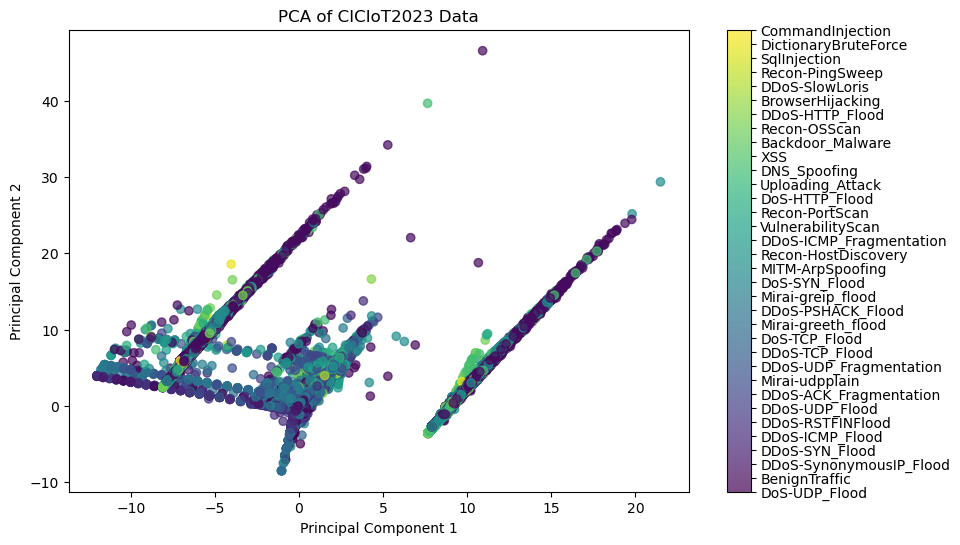

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_vis[candidate_features])

# Compute PCA embedding
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Display explained variance ratio for each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Build a DataFrame of feature loadings on each component
loadings = pd.DataFrame(
    pca.components_,
    columns=candidate_features,
    index=["PC1", "PC2"]
)

# Display feature contributions to each principal component
print(loadings.T)


# Encode labels as integers and get label names
labels_idx, label_names = pd.factorize(df_vis['label'])

# Plot PCA scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=labels_idx,
    cmap='viridis',
    alpha=0.7
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of CICIoT2023 Data')

# Display colorbar with label names
cbar = plt.colorbar(scatter, ticks=range(len(label_names)))
cbar.set_ticklabels(label_names)

plt.show()

## 4. t-SNE Analysis

Apply t-SNE to reduce the dimensionality to 2 components and visualize the results. Note that t-SNE can be computationally expensive, so consider reducing the sample size if needed.

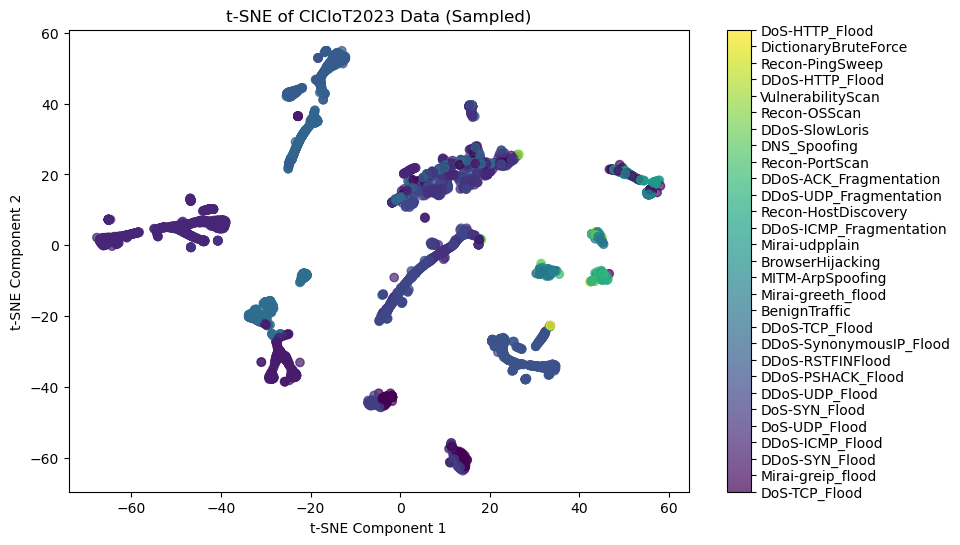

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select subset for t-SNE if needed
sample_size = 5000
if X_scaled.shape[0] > sample_size:
    idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
    X_sample = X_scaled[idx]
    y_sample = df_vis['label'].iloc[idx]
else:
    X_sample = X_scaled
    y_sample = df_vis['label']

# Encode labels as integers and get label names
labels_idx_tsne, label_names_tsne = pd.factorize(y_sample)

# Compute t-SNE embedding
tsne = TSNE(n_components=2, random_state=42, perplexity=100, n_iter=2000)
X_tsne = tsne.fit_transform(X_sample)

# Plot t-SNE scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=labels_idx_tsne,
    cmap='viridis',
    alpha=0.7
)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of CICIoT2023 Data (Sampled)')

# Display colorbar with label names
cbar = plt.colorbar(scatter, ticks=range(len(label_names_tsne)))
cbar.set_ticklabels(label_names_tsne)

plt.show()

### Why random_state=42

In Douglas Adams’ sci-fi comedy novel The Hitchhiker’s Guide to the Galaxy, a group of hyper-intelligent beings builds a supercomputer named Deep Thought to find “the Answer to the Ultimate Question of Life, the Universe, and Everything.”

💡 After seven and a half million years of computation, Deep Thought finally reveals the answer:

“42.”

This response is completely absurd and hilarious because:
- No one actually knows what the question is.
- The answer is meaningless without the actual question.

## Conclusion

The PCA and t-SNE visualizations provide insight into the structure of the data. The PCA plot shows the linear projections, while the t-SNE plot (performed on a sample) can reveal non-linear clusters. You can adjust the t-SNE parameters (like perplexity and iteration count) if needed for better visualization.